In [1]:
import requests
import json
from mobfot import MobFot
from mplsoccer import Pitch


import matplotlib.patheffects as path_effects

from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
from matplotlib import cm
from highlight_text import fig_text, ax_text
from ast import literal_eval

from PIL import Image
import urllib
import os
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import pandas as pd
from bs4 import BeautifulSoup
# import klib as kb
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
# import wes
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from sklearn.preprocessing import StandardScaler


In [2]:
def get_team_urls(x):  
    url = x
    data  = requests.get(url).text
    soup = BeautifulSoup(data)
    player_urls = []
    links = BeautifulSoup(data).select('th a')
    urls = [link['href'] for link in links]
    urls = list(set(urls))
    full_urls = []
    for y in urls:
        full_url = "https://fbref.com"+y
        full_urls.append(full_url)
    team_names = []
    for team in urls: 
        team_name_slice = team[20:-6]
        team_names.append(team_name_slice)
    list_of_tuples = list(zip(team_names, full_urls))
    Team_url_database = pd.DataFrame(list_of_tuples, columns = ['team_names', 'urls'])
    return Team_url_database

In [3]:
team_table = get_team_urls("https://fbref.com/en/comps/9/Premier-League-Stats")  
team_table

,team_names,urls
0,Arsenal,https://fbref.com/en/squads/18bb7c10/Arsenal-S...
1,Wolverhampton-Wanderers,https://fbref.com/en/squads/8cec06e1/Wolverham...
2,Fulham,https://fbref.com/en/squads/fd962109/Fulham-Stats
3,Ipswich-Town,https://fbref.com/en/squads/b74092de/Ipswich-T...
4,Crystal-Palace,https://fbref.com/en/squads/47c64c55/Crystal-P...
5,Leicester-City,https://fbref.com/en/squads/a2d435b3/Leicester...
6,Brentford,https://fbref.com/en/squads/cd051869/Brentford...
7,Nottingham-Forest,https://fbref.com/en/squads/e4a775cb/Nottingha...
8,Southampton,https://fbref.com/en/squads/33c895d4/Southampt...
9,Brighton-and-Hove-Albion,https://fbref.com/en/squads/d07537b9/Brighton-...


In [4]:

team_table = team_table[["team_names","urls"]]

def get_wages(url):    
    start = url[0:37]+ "2024-2025/wages/"
    def remove_first_n_char(org_str, n):
        mod_string = ""
        for i in range(n, len(org_str)):
            mod_string = mod_string + org_str[i]
        return mod_string
    mod_string = remove_first_n_char(url, 37)
    final_string = start+mod_string+"-Wage-Details"   
    return final_string

team_table['wages'] = team_table.apply(lambda x: get_wages(x['urls']), axis=1)

team_table

,team_names,urls,wages
0,Arsenal,https://fbref.com/en/squads/18bb7c10/Arsenal-S...,https://fbref.com/en/squads/18bb7c10/2024-2025...
1,Wolverhampton-Wanderers,https://fbref.com/en/squads/8cec06e1/Wolverham...,https://fbref.com/en/squads/8cec06e1/2024-2025...
2,Fulham,https://fbref.com/en/squads/fd962109/Fulham-Stats,https://fbref.com/en/squads/fd962109/2024-2025...
3,Ipswich-Town,https://fbref.com/en/squads/b74092de/Ipswich-T...,https://fbref.com/en/squads/b74092de/2024-2025...
4,Crystal-Palace,https://fbref.com/en/squads/47c64c55/Crystal-P...,https://fbref.com/en/squads/47c64c55/2024-2025...
5,Leicester-City,https://fbref.com/en/squads/a2d435b3/Leicester...,https://fbref.com/en/squads/a2d435b3/2024-2025...
6,Brentford,https://fbref.com/en/squads/cd051869/Brentford...,https://fbref.com/en/squads/cd051869/2024-2025...
7,Nottingham-Forest,https://fbref.com/en/squads/e4a775cb/Nottingha...,https://fbref.com/en/squads/e4a775cb/2024-2025...
8,Southampton,https://fbref.com/en/squads/33c895d4/Southampt...,https://fbref.com/en/squads/33c895d4/2024-2025...
9,Brighton-and-Hove-Albion,https://fbref.com/en/squads/d07537b9/Brighton-...,https://fbref.com/en/squads/d07537b9/2024-2025...


In [5]:
import time
def league_wages_df(match_links):
    data_append = []
    for x in match_links:
        print(x)
        warnings.filterwarnings("ignore")
        url = x
        page =requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        name = [element.text for element in soup.find_all("span")]
        name = name[7]
        # name = name[10:]

        # Remove last 17 characters
        name = name[:-17]
        html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
        df = pd.read_html(html_content)
        wage_stats = df[0]
        def remove_nan_rows(df, column_name):
            df.dropna(subset=[column_name], inplace=True)
            return df
        wage_stats = remove_nan_rows(wage_stats, "Weekly Wages")
        def extract_currency_values(column_value):
            parts = column_value.split(" ")
            pound_value = parts[0] + "  " + parts[1]
            euro_value = parts[3]
            dollar_value = parts[4]
            return pound_value, euro_value, dollar_value

        wage_stats[["Pound Value", "Euro Value", "Dollar Value"]] = wage_stats["Weekly Wages"].apply(extract_currency_values).apply(pd.Series)
        def convert_pound_values_to_int(df, column_name):
            df['new_pound_value'] = df[column_name].str.replace('£', '').str.replace(',', '').astype(int)
            return df
        wage_stats = convert_pound_values_to_int(wage_stats, "Pound Value")
        wage_stats = wage_stats[["Player", "Nation","Pos","Age","new_pound_value"]]
        # wage_stats['Player'] = name
        data_append.append(wage_stats)
        del df, soup
        time.sleep(10)
    df_total = pd.concat(data_append)

    return df_total

In [6]:
match_links = list(team_table.wages.unique())
wages_df = league_wages_df(match_links)
wages_df.to_csv("CSVs/EPL_Player_Wages.csv")

https://fbref.com/en/squads/18bb7c10/2024-2025/wages/Arsenal-Stats-Wage-Details
https://fbref.com/en/squads/8cec06e1/2024-2025/wages/Wolverhampton-Wanderers-Stats-Wage-Details
https://fbref.com/en/squads/fd962109/2024-2025/wages/Fulham-Stats-Wage-Details
https://fbref.com/en/squads/b74092de/2024-2025/wages/Ipswich-Town-Stats-Wage-Details
https://fbref.com/en/squads/47c64c55/2024-2025/wages/Crystal-Palace-Stats-Wage-Details
https://fbref.com/en/squads/a2d435b3/2024-2025/wages/Leicester-City-Stats-Wage-Details
https://fbref.com/en/squads/cd051869/2024-2025/wages/Brentford-Stats-Wage-Details
https://fbref.com/en/squads/e4a775cb/2024-2025/wages/Nottingham-Forest-Stats-Wage-Details
https://fbref.com/en/squads/33c895d4/2024-2025/wages/Southampton-Stats-Wage-Details
https://fbref.com/en/squads/d07537b9/2024-2025/wages/Brighton-and-Hove-Albion-Stats-Wage-Details
https://fbref.com/en/squads/cff3d9bb/2024-2025/wages/2024-2025/Chelsea-Stats-Wage-Details
https://fbref.com/en/squads/361ca564/2024-2

In [4]:
wages_df = pd.read_csv("CSVs/EPL_Player_Wages.csv")

In [7]:
wages_df

,Player,Nation,Pos,Age,new_pound_value
0,Kai Havertz,de GER,"FW,MF",25.0,280000
1,Gabriel Jesus,br BRA,"FW,MF",27.0,265000
2,Declan Rice,eng ENG,MF,25.0,240000
3,Martin Ødegaard,no NOR,MF,25.0,240000
4,Thomas Partey,gh GHA,"MF,DF",31.0,200000
...,...,...,...,...,...
23,Altay Bayındır,tr TUR,GK,26.0,35000
24,Amad Diallo,ci CIV,"MF,FW",22.0,28846
25,Kobbie Mainoo,NaN,CM,19.0,20000
26,Toby Collyer,NaN,DM,20.0,5000


In [8]:
import sys
# Add the directory containing FBREF_Aggregations.py to the Python path
module_path = os.path.abspath(os.path.join('/Users/stephenahiabah/Desktop/Code/cannoniq'))
if module_path not in sys.path:
    sys.path.append(module_path)

import FBREF_Aggregations as fbref

fb_ref_db = fbref.CreateFBRefDatabase()


epl_db = fb_ref_db.generate_pitch_iq_scores()

In [129]:
merged_df = pd.merge(wages_df, epl_db, on=['Player', 'Nation', 'Pos'], how='inner')


,Player,Nation,Pos_x,Age_x,new_pound_value,Pos_y,Squad,Age_y,position_group,90s,Total - Cmp%,KP,TB,Sw,PPA,PrgP,Tkl%,Blocks,Tkl+Int,Clr,Carries - PrgDist,SCA90,GCA90,CrsPA,xA,Rec,PrgR,xG,Sh,SoT,Passing_Score,Defending_Score,Creation_Score,Shooting_Score
0,Kai Havertz,de GER,"FW,MF",25.0,280000,"FW,MF",Arsenal,25,Forwards,20.8,78.4,0.817308,0.048077,0.000000,0.432692,2.932692,26.7,0.528846,1.057692,1.586538,45.865385,2.02,0.14,0.048077,0.081731,28.076923,5.432692,0.456731,2.548077,1.009615,6.431534,5.794314,6.044640,5.847593
1,Gabriel Jesus,br BRA,"FW,MF",27.0,265000,FW,Arsenal,27,Forwards,6.8,76.8,1.176471,0.147059,0.000000,1.323529,2.794118,44.4,1.764706,2.058824,1.176471,63.529412,2.66,0.59,0.147059,0.073529,31.911765,8.382353,0.441176,2.941176,1.029412,6.578685,6.260403,6.369702,5.960071
2,Declan Rice,eng ENG,MF,25.0,240000,MF,Arsenal,25,Central Midfielders,31.4,83.4,1.878981,0.159236,0.541401,1.114650,6.114650,41.5,0.477707,2.484076,1.624204,108.089172,3.54,0.32,0.159236,0.178344,40.318471,2.993631,0.111465,1.528662,0.445860,7.517017,6.752707,7.147878,6.170458
3,Martin Ødegaard,no NOR,MF,25.0,240000,MF,Arsenal,25,Central Midfielders,25.8,82.5,2.441860,0.968992,0.116279,3.333333,10.000000,16.0,1.046512,0.968992,0.232558,146.201550,4.80,0.70,0.193798,0.259690,51.782946,5.968992,0.186047,1.860465,0.581395,8.270282,6.680324,8.050561,6.669590
4,Thomas Partey,gh GHA,"MF,DF",31.0,200000,"MF,DF",Arsenal,31,Central Midfielders,31.1,87.4,0.643087,0.192926,0.128617,1.061093,5.948553,60.5,0.418006,3.987138,1.575563,118.681672,2.00,0.42,0.064309,0.083601,50.192926,1.543408,0.073955,0.836013,0.289389,7.352026,6.990320,6.972405,5.955934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Diogo Dalot,pt POR,DF,25.0,85000,DF,Manchester Utd,25,Defender,31.3,80.5,0.830671,0.127796,0.255591,0.798722,3.290735,65.4,1.150160,3.354633,2.300319,86.230032,2.37,0.16,0.255591,0.079872,38.338658,5.367412,0.063898,0.798722,0.159744,6.168765,6.260800,5.823655,5.048976
481,Tyrell Malacia,nl NED,DF,24.0,75000,DF,Manchester Utd,24,Defender,1.1,89.1,0.909091,0.000000,0.000000,0.909091,2.727273,50.0,1.818182,2.727273,0.909091,107.272727,1.80,0.00,0.000000,0.000000,39.090909,5.454545,0.000000,0.000000,0.000000,6.921190,6.567269,6.517177,5.503666
482,Jonny Evans,nir NIR,DF,36.0,65000,DF,Manchester Utd,36,Defender,3.5,88.5,0.000000,0.000000,0.000000,0.285714,2.857143,50.0,0.285714,3.714286,4.285714,69.142857,0.57,0.00,0.000000,0.000000,43.142857,0.857143,0.028571,0.571429,0.285714,6.312817,6.199517,5.727434,5.153906
483,Altay Bayındır,tr TUR,GK,26.0,35000,GK,Manchester Utd,26,GK,4.0,60.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,2.250000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.442040,4.819662,4.707995,4.668758


In [127]:
merged_df = merged_df[['Player', 'Nation', 'Pos', 'new_pound_value','90s' ,'Squad','Passing_Score', 'Defending_Score',	'Creation_Score','Shooting_Score' ]]

KeyError: "['Pos'] not in index"

In [35]:
fm_ids = pd.read_csv("/Users/stephenahiabah/Desktop/Code/cannoniq/CSVs/Top6_leagues_fotmob_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]
fm_ids = fm_ids.rename(columns={'team': 'Squad'})
merged_df = merged_df.merge(fm_ids, on='Squad', how='left')

In [36]:
merged_df= merged_df.drop_duplicates(subset=['Player'])

In [37]:
merged_df.Pos.unique()

array(['FW,MF', 'MF', 'MF,DF', 'DF', 'DF,MF', 'MF,FW', 'GK', 'FW',
       'DF,FW', 'FW,DF'], dtype=object)

In [38]:
merged_df

,Player,Nation,Pos,new_pound_value,90s,Squad,Passing_Score,Defending_Score,Creation_Score,Shooting_Score,team_id
0,Kai Havertz,de GER,"FW,MF",280000,20.8,Arsenal,6.431534,5.794314,6.044640,5.847593,9825
1,Declan Rice,eng ENG,MF,240000,31.4,Arsenal,7.517017,6.752707,7.147878,6.170458,9825
2,Martin Ødegaard,no NOR,MF,240000,25.8,Arsenal,8.270282,6.680324,8.050561,6.669590,9825
3,Thomas Partey,gh GHA,"MF,DF",200000,31.1,Arsenal,7.352026,6.990320,6.972405,5.955934,9825
4,Bukayo Saka,eng ENG,"FW,MF",195000,19.2,Arsenal,7.477230,6.971527,7.912040,6.638569,9825
...,...,...,...,...,...,...,...,...,...,...,...
439,Diogo Dalot,pt POR,DF,85000,31.3,Manchester Utd,6.168765,6.260800,5.823655,5.048976,10260
440,Tyrell Malacia,nl NED,DF,75000,1.1,Manchester Utd,6.921190,6.567269,6.517177,5.503666,10260
441,Jonny Evans,nir NIR,DF,65000,3.5,Manchester Utd,6.312817,6.199517,5.727434,5.153906,10260
442,Altay Bayındır,tr TUR,GK,35000,4.0,Manchester Utd,5.442040,4.819662,4.707995,4.668758,10260


In [122]:
merged_df[merged_df['Player']=='Gabriel Jesus']

,Player,Nation,Pos,new_pound_value,90s,Squad,Passing_Score,Defending_Score,Creation_Score,Shooting_Score,team_id


In [39]:
# Split the DataFrame into goalkeepers and outfield players
gk_df_wage = merged_df[merged_df['Pos'].str.contains('GK')]
outfield_df = merged_df[~merged_df['Pos'].str.contains('GK')]

# Define position weights for outfield players
position_weights = {
    'DF': {'Passing_Score': 0.3, 'Defending_Score': 0.4, 'Creation_Score': 0.2, 'Shooting_Score': 0.1},
    'MF': {'Passing_Score': 0.25, 'Defending_Score': 0.25, 'Creation_Score': 0.25, 'Shooting_Score': 0.25},
    'FW': {'Passing_Score': 0.1, 'Defending_Score': 0.1, 'Creation_Score': 0.3, 'Shooting_Score': 0.5},
    'DF,MF': {'Passing_Score': 0.3, 'Defending_Score': 0.35, 'Creation_Score': 0.3, 'Shooting_Score': 0.05},
    'FW,MF': {'Passing_Score': 0.2, 'Defending_Score': 0.1, 'Creation_Score': 0.35, 'Shooting_Score': 0.35},
    'MF,FW': {'Passing_Score': 0.2, 'Defending_Score': 0.1, 'Creation_Score': 0.4, 'Shooting_Score': 0.3},
    'MF,DF': {'Passing_Score': 0.25, 'Defending_Score': 0.35, 'Creation_Score': 0.2, 'Shooting_Score': 0.2},
    'FW,DF': {'Passing_Score': 0.2, 'Defending_Score': 0.3, 'Creation_Score': 0.3, 'Shooting_Score': 0.2},
    'DF,FW': {'Passing_Score': 0.2, 'Defending_Score': 0.3, 'Creation_Score': 0.3, 'Shooting_Score': 0.2},
}

# Function to calculate general rating
def calculate_general_rating(row, position_weights):
    pos = row['Pos']
    weights = position_weights.get(pos, {'Passing_Score': 0.25, 'Defending_Score': 0.25, 'Creation_Score': 0.25, 'Shooting_Score': 0.25})  # Default weights if position not found
    general_rating = (
        row['Passing_Score'] * weights['Passing_Score'] +
        row['Defending_Score'] * weights['Defending_Score'] +
        row['Creation_Score'] * weights['Creation_Score'] +
        row['Shooting_Score'] * weights['Shooting_Score']
    )
    return general_rating

# Apply the function to calculate the general rating for outfield players
outfield_df['General_Rating'] = outfield_df.apply(lambda row: calculate_general_rating(row, position_weights), axis=1)

# Reduce General_Rating by 30% if '90s' is less than 5
outfield_df.loc[outfield_df['90s'] < 10, 'General_Rating'] *= 0.7

# Display the resulting DataFrames
outfield_df[['Player', 'Pos', 'Squad', 'new_pound_value', 'General_Rating', '90s']].sort_values('General_Rating', ascending=False).tail(60)


,Player,Pos,Squad,new_pound_value,General_Rating,90s
383,Joe Gomez,DF,Liverpool,85000,4.348661,5.8
76,Chiedozie Ogbene,FW,Ipswich Town,25000,4.339579,2.6
134,Mathias Jensen,MF,Brentford,50000,4.330122,9.6
323,Andy Irving,MF,West Ham,5000,4.313395,1.8
80,Massimo Luongo,MF,Ipswich Town,10000,4.312242,2.2
228,Jeremy Sarmiento,MF,Brighton,20000,4.310791,0.1
318,Aaron Cresswell,DF,West Ham,50000,4.281884,9.2
11,Jorginho,MF,Arsenal,110000,4.279244,7.8
348,James Hill,DF,Bournemouth,5000,4.276353,5.0
34,Rodrigo Gomes,"DF,FW",Wolves,25000,4.260819,9.0


In [40]:
outfield_df= outfield_df[['Player', 'Nation', 'Pos', 'new_pound_value', 'Squad', 'team_id', 'General_Rating','90s']]
outfield_df

,Player,Nation,Pos,new_pound_value,Squad,team_id,General_Rating,90s
0,Kai Havertz,de GER,"FW,MF",280000,Arsenal,9825,6.028020,20.8
1,Declan Rice,eng ENG,MF,240000,Arsenal,9825,6.897015,31.4
2,Martin Ødegaard,no NOR,MF,240000,Arsenal,9825,7.417689,25.8
3,Thomas Partey,gh GHA,"MF,DF",200000,Arsenal,9825,6.870286,31.1
4,Bukayo Saka,eng ENG,"FW,MF",195000,Arsenal,9825,7.285312,19.2
...,...,...,...,...,...,...,...,...
438,Rasmus Højlund,dk DEN,FW,85000,Manchester Utd,10260,5.742205,22.3
439,Diogo Dalot,pt POR,DF,85000,Manchester Utd,10260,6.024578,31.3
440,Tyrell Malacia,nl NED,DF,75000,Manchester Utd,10260,4.589947,1.1
441,Jonny Evans,nir NIR,DF,65000,Manchester Utd,10260,4.224170,3.5


In [121]:
outfield_df[outfield_df['Player']=='Gabriel Jesus']

,Player,Nation,Pos,new_pound_value,Squad,team_id,General_Rating,90s


In [41]:
keepers = pd.read_csv("/Users/stephenahiabah/Desktop/Code/cannoniq/CSVs/pl_clowns.csv")

In [42]:
keepers = keepers[['Player', 'Nation', 'Position','Minutes_90s' ,'Squad','CLOWN_Rating']]

In [43]:
gk_df = keepers

# Step 1: Reverse the CLOWN_Rating scale
gk_df['Reversed_Rating'] = gk_df['CLOWN_Rating'].max() - gk_df['CLOWN_Rating']

# Step 2: Rescale to 8.5 to 4
min_reversed = gk_df['Reversed_Rating'].min()
max_reversed = gk_df['Reversed_Rating'].max()
gk_df['Rescaled_Rating'] = 4 + ((gk_df['Reversed_Rating'] - min_reversed) / (max_reversed - min_reversed)) * (8.5 - 4)

# Step 3: Rename columns
gk_df.rename(columns={'Minutes_90s': '90s', 'Position': 'Pos'}, inplace=True)

gk_df.loc[gk_df['90s'] < 3, 'Rescaled_Rating'] *= 0.7

# Drop intermediate columns (Reversed_Rating and CLOWN_Rating)
gk_df.drop(columns=['Reversed_Rating', 'CLOWN_Rating'], inplace=True)

# Display the resulting DataFrame
gk_df

,Player,Nation,Pos,90s,Squad,Rescaled_Rating
0,Alisson,br BRA,GK,20.9,Liverpool,7.203125
1,Alphonse Areola,fr FRA,GK,17.1,West Ham,7.421875
2,Kepa Arrizabalaga,es ESP,GK,22.0,Bournemouth,5.328125
3,Brandon Austin,eng ENG,GK,1.0,Tottenham,5.950000
4,Martin Dúbravka,sk SVK,GK,10.0,Newcastle Utd,6.203125
5,Ederson,br BRA,GK,19.0,Manchester City,4.859375
6,Łukasz Fabiański,pl POL,GK,11.9,West Ham,4.984375
7,Mark Flekken,nl NED,GK,27.4,Brentford,5.296875
8,Fraser Forster,eng ENG,GK,7.0,Tottenham,5.250000
9,Dean Henderson,eng ENG,GK,28.0,Crystal Palace,4.000000


In [62]:
gk_df_wage = gk_df_wage[['Player', 'Nation', 'Pos', 'new_pound_value', 'Squad', 'team_id', '90s']]

gk_df_merged_df = pd.merge(gk_df, gk_df_wage, on=['Player', 'Nation', 'Pos','Squad'], how='inner')
gk_df_merged_df.rename(columns={'Rescaled_Rating': 'General_Rating'}, inplace=True)

fm_ids = pd.read_csv("/Users/stephenahiabah/Desktop/Code/cannoniq/CSVs/Top6_leagues_fotmob_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]
fm_ids = fm_ids.rename(columns={'team': 'Squad'})
gk_df_merged_df = gk_df_merged_df.merge(fm_ids, on='Squad', how='left')


In [63]:
gk_df_merged_df

,Player,Nation,Pos,90s_x,Squad,General_Rating,new_pound_value,team_id_x,90s_y,team_id_y
0,Alisson,br BRA,GK,20.9,Liverpool,7.203125,150000,8650,27.9,8650
1,Alphonse Areola,fr FRA,GK,17.1,West Ham,7.421875,120000,8654,25.1,8654
2,Kepa Arrizabalaga,es ESP,GK,22.0,Bournemouth,5.328125,75000,8678,31.0,8678
3,Brandon Austin,eng ENG,GK,1.0,Tottenham,5.950000,15000,8586,1.0,8586
4,Martin Dúbravka,sk SVK,GK,10.0,Newcastle Utd,6.203125,40000,10261,10.0,10261
5,Ederson,br BRA,GK,19.0,Manchester City,4.859375,100000,8456,25.8,8456
6,Łukasz Fabiański,pl POL,GK,11.9,West Ham,4.984375,65000,8654,12.9,8654
7,Mark Flekken,nl NED,GK,27.4,Brentford,5.296875,30000,9937,36.4,9937
8,Fraser Forster,eng ENG,GK,7.0,Tottenham,5.250000,75000,8586,7.0,8586
9,Dean Henderson,eng ENG,GK,28.0,Crystal Palace,4.000000,100000,9826,38.0,9826


In [65]:
# gk_df_merged_df = gk_df_merged_df.drop(columns=['team_id_y'], inplace=True)
gk_df_merged_df = gk_df_merged_df.rename(columns={'team_id_x': 'team_id'})
gk_df_merged_df = gk_df_merged_df.rename(columns={'90s_y': '90s'})
gk_df_merged_df = gk_df_merged_df[['Player', 'Nation', 'Pos', 'new_pound_value', 'Squad', 'team_id', 'General_Rating','90s']]

In [66]:
gk_df_merged_df

,Player,Nation,Pos,new_pound_value,Squad,team_id,General_Rating,90s
0,Alisson,br BRA,GK,150000,Liverpool,8650,7.203125,27.9
1,Alphonse Areola,fr FRA,GK,120000,West Ham,8654,7.421875,25.1
2,Kepa Arrizabalaga,es ESP,GK,75000,Bournemouth,8678,5.328125,31.0
3,Brandon Austin,eng ENG,GK,15000,Tottenham,8586,5.950000,1.0
4,Martin Dúbravka,sk SVK,GK,40000,Newcastle Utd,10261,6.203125,10.0
5,Ederson,br BRA,GK,100000,Manchester City,8456,4.859375,25.8
6,Łukasz Fabiański,pl POL,GK,65000,West Ham,8654,4.984375,12.9
7,Mark Flekken,nl NED,GK,30000,Brentford,9937,5.296875,36.4
8,Fraser Forster,eng ENG,GK,75000,Tottenham,8586,5.250000,7.0
9,Dean Henderson,eng ENG,GK,100000,Crystal Palace,9826,4.000000,38.0


In [71]:
full_df = pd.concat([outfield_df, gk_df_merged_df] , ignore_index=True)

In [72]:
full_df

,Player,Nation,Pos,new_pound_value,Squad,team_id,General_Rating,90s
0,Kai Havertz,de GER,"FW,MF",280000,Arsenal,9825,6.028020,20.8
1,Declan Rice,eng ENG,MF,240000,Arsenal,9825,6.897015,31.4
2,Martin Ødegaard,no NOR,MF,240000,Arsenal,9825,7.417689,25.8
3,Thomas Partey,gh GHA,"MF,DF",200000,Arsenal,9825,6.870286,31.1
4,Bukayo Saka,eng ENG,"FW,MF",195000,Arsenal,9825,7.285312,19.2
...,...,...,...,...,...,...,...,...
393,Mark Travers,ie IRL,GK,20000,Bournemouth,8678,4.468750,5.0
394,Bart Verbruggen,nl NED,GK,35000,Brighton,10204,7.859375,36.0
395,Guglielmo Vicario,it ITA,GK,75000,Tottenham,8586,4.593750,24.0
396,Christian Walton,eng ENG,GK,20000,Ipswich Town,9902,6.765625,7.0


In [73]:
arsenal = full_df[full_df['team_id'] == 9825]

In [130]:
def add_new_arsenal_players(df):
    new_players = pd.DataFrame([
        {
            "Player": "Myles Lewis-Skelly",
            "Nation": "eng ENG",
            "Pos": "DF",
            "new_pound_value": 15000,
            "Squad": "Arsenal",
            "team_id": 9825,
            "General_Rating": 7.2,
            "90s": 15.2
        },
        {
            "Player": "Ethan Nwaneri",
            "Nation": "eng ENG",
            "Pos": "FW,MF",
            "new_pound_value": 20000,
            "Squad": "Arsenal",
            "team_id": 9825,
            "General_Rating": 7.01,
            "90s": 9.9
        },
                {
            "Player": "Gabriel Jesus",
            "Nation": "br BRA",
            "Pos": "FW",
            "new_pound_value": 265000,
            "Squad": "Arsenal",
            "team_id": 9825,
            "General_Rating": 6.2,
            "90s": 6.8
        }
    ])
    return pd.concat([df, new_players], ignore_index=True)

# Apply the function
arsenal = add_new_arsenal_players(arsenal)

In [131]:
keepers = ['GK']
defenders = ["DF",'DF,MF']
wing_backs = ['FW,DF','DF,FW']
midfielders = ['MF,DF','MF']
forwards = ['FW','MF,FW',"FW,MF"]
def position_grouping(x):
    if x in keepers:
        return "GK"
    elif x in defenders:
        return "Defender"
    elif x in wing_backs:
        return "Wing-Back"
    elif x in midfielders:
        return "Central Midfielders"
    elif x in forwards:
        return "Forwards"
    else:
        return "unidentified position"
    
arsenal['Position_Group'] = arsenal['Pos'].apply(position_grouping)

In [132]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Reshape and scale the '90s'
scaler = MinMaxScaler()
scaled_90s = scaler.fit_transform(arsenal[['90s']])

# Generate new ratings: map scaled 90s to range 5–9
arsenal['General_Rating'] = 5 + (scaled_90s.flatten() * 4)

In [133]:
arsenal

,Player,Nation,Pos,new_pound_value,Squad,team_id,General_Rating,90s,Position_Group,new_pound_value_2,zscore,annotated
0,Kai Havertz,de GER,"FW,MF",280000,Arsenal,9825,7.184697,20.8,Forwards,280.0,2.104117,True
1,Declan Rice,eng ENG,MF,240000,Arsenal,9825,8.303430,31.4,Central Midfielders,240.0,2.581750,True
2,Martin Ødegaard,no NOR,MF,240000,Arsenal,9825,7.712401,25.8,Central Midfielders,240.0,2.028121,True
3,Thomas Partey,gh GHA,"MF,DF",200000,Arsenal,9825,8.271768,31.1,Central Midfielders,200.0,1.981784,True
4,Bukayo Saka,eng ENG,"FW,MF",195000,Arsenal,9825,7.015831,19.2,Forwards,195.0,0.734035,True
5,William Saliba,fr FRA,DF,190000,Arsenal,9825,8.556728,33.8,Defender,190.0,2.106136,True
6,Gabriel Martinelli,br BRA,"FW,MF",180000,Arsenal,9825,7.670185,25.4,Forwards,180.0,1.133116,True
7,Oleksandr Zinchenko,ua UKR,"DF,MF",150000,Arsenal,9825,5.612137,5.9,Defender,150.0,-1.222429,True
8,Ben White,eng ENG,DF,150000,Arsenal,9825,6.393140,13.3,Defender,150.0,-0.490848,True
9,Mikel Merino,es ESP,"MF,FW",130000,Arsenal,9825,6.846966,17.6,Forwards,130.0,-0.350894,True


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib import image

def visualize_results(arsenal):
    """
    Visualize the results using plots with FiveThirtyEight style, no grid lines, smaller text, and player name annotations.
    """
    # Apply FiveThirtyEight style
    plt.style.use("fivethirtyeight")

    # Plot CLOWN Ratings
    plt.figure(figsize=(10, 6))
    sns.histplot(arsenal['General_Rating'], bins=20, kde=True)
    plt.title('Distribution of General Ratings', fontsize=14)  # Smaller title
    plt.xlabel('General Rating', fontsize=12)  # Smaller x-label
    plt.ylabel('Frequency', fontsize=12)  # Smaller y-label
    plt.grid(False)  # Remove grid lines

    # Add league icon (top-left corner)
    try:
        league_icon = Image.open("/Users/stephenahiabah/Desktop/Code/cannoniq/Images/premier-league-2-logo.png")
        league_ax = plt.gcf().add_axes([0.02, 0.88, 0.10, 0.10], zorder=1)  # Top-left corner
        league_ax.imshow(league_icon)
        league_ax.axis("off")
    except FileNotFoundError:
        print("League icon not found. Skipping...")

    # Add custom logo (top-right corner)
    try:
        ax3 = plt.gcf().add_axes([0.88, 0.88, 0.10, 0.10], zorder=1)  # Top-right corner
        ax3.axis('off')
        img = image.imread('/Users/stephenahiabah/Desktop/Code/cannoniq/Images/piqmain.png')
        ax3.imshow(img)
    except FileNotFoundError:
        print("Custom logo not found. Skipping...")

    plt.show()

    # Scatter plot of Goals Conceded vs. CLOWN Rating
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(x='new_pound_value', y='General_Rating', data=arsenal, hue='Position_Group', palette='viridis')
    plt.title('Wages vs Rating', fontsize=14)  # Smaller title
    plt.xlabel('Wages', fontsize=12)  # Smaller x-label
    plt.ylabel('General Rating', fontsize=12)  # Smaller y-label
    plt.grid(False)  # Remove grid lines

    # Annotate player names on the scatter plot
    for index, row in arsenal.iterrows():
        plt.annotate(
            text=row['Player'],  # Player name
            xy=(row['new_pound_value'], row['General_Rating']),  # Coordinates of the point
            xytext=(5, -10),  # Offset for the text
            textcoords='offset points',  # Use offset points for positioning
            fontsize=8,  # Smaller font size for annotations
            color='black',  # Text color
            alpha=0.75  # Slightly transparent text
        )

    # Add league icon (top-left corner)
    try:
        league_icon = Image.open("/Users/stephenahiabah/Desktop/Code/cannoniq/Images/premier-league-2-logo.png")
        league_ax = plt.gcf().add_axes([0.02, 0.88, 0.10, 0.10], zorder=1)  # Top-left corner
        league_ax.imshow(league_icon)
        league_ax.axis("off")
    except FileNotFoundError:
        print("League icon not found. Skipping...")

    # Add custom logo (top-right corner)
    try:
        ax3 = plt.gcf().add_axes([0.88, 0.88, 0.10, 0.10], zorder=1)  # Top-right corner
        ax3.axis('off')
        img = image.imread('/Users/stephenahiabah/Desktop/Code/cannoniq/Images/piqmain.png')
        ax3.imshow(img)
    except FileNotFoundError:
        print("Custom logo not found. Skipping...")

    plt.show()

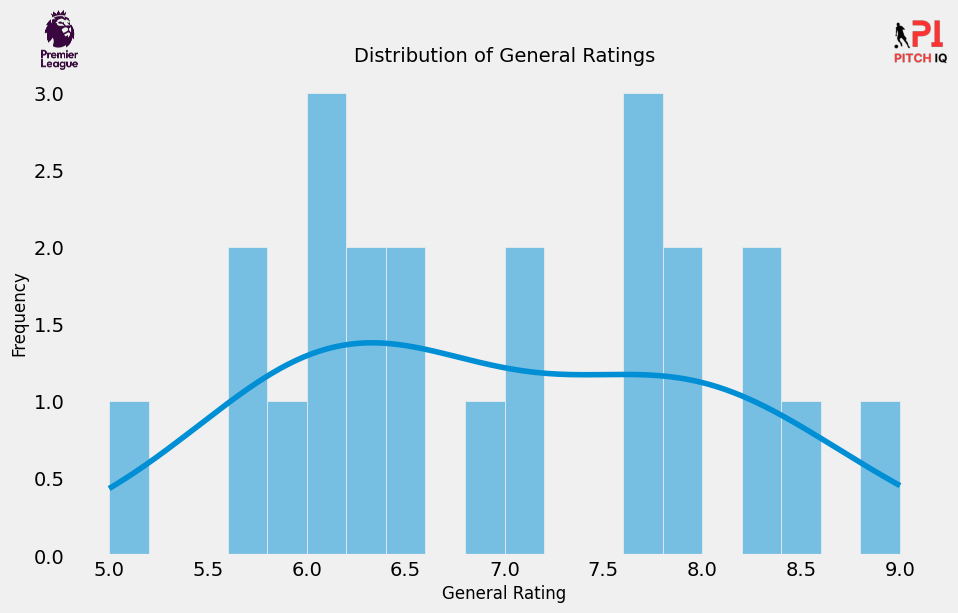

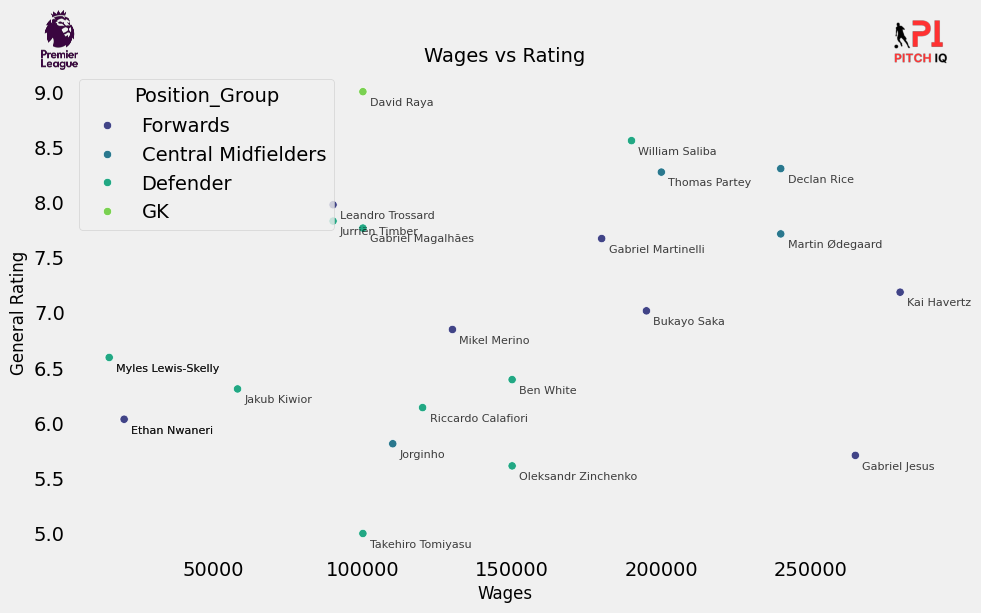

In [135]:
visualize_results(arsenal)

In [136]:
def create_team_table(epl_player_ratings,t_id ):
    wages_df = pd.read_csv("CSVs/EPL_Player_Wages.csv")
    wages_df.rename(columns={'Player': 'Name'}, inplace=True)
    def get_approximate_match(query, choices):
        return process.extractOne(query, choices)[0]
    name_mapping = {}
    for name in wages_df['Name']:
        match = get_approximate_match(name, epl_player_ratings['Name'])
        name_mapping[name] = match
    wages_df['Name'] = wages_df['Name'].map(name_mapping)
    merged_df = pd.merge(wages_df, epl_player_ratings, on='Name', how='left')
    merged_df.dropna(subset=['Nation'], inplace=True)
    filtered_df = merged_df[merged_df['team_id'] == t_id]
    filtered_df['player_id'] = filtered_df['URL'].str.extract(r'(\d+)')
    filtered_df = filtered_df[filtered_df['FotMobRating'].notna()]

    total_wages = filtered_df['new_pound_value'].sum()

    # Calculate wage contribution percentage
    filtered_df['wage_contribution'] = (filtered_df['new_pound_value'] / total_wages)

    return filtered_df

t_id = 9825
filtered_df = create_team_table(epl_player_ratings, t_id)

NameError: name 'epl_player_ratings' is not defined

In [42]:


# -- For Logos and images
from matplotlib.transforms import Bbox
class BboxLocator:
    def __init__(self, bbox, transform):
        self._bbox = bbox
        self._transform = transform
    def __call__(self, ax, renderer):
        _bbox = self._transform.transform_bbox(self._bbox)
        return ax.figure.transFigure.inverted().transform_bbox(_bbox)

def draw_player_image_at_ax(player_id, ax, grayscale=False):
    '''
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/playerimages/'
    club_icon = Image.open(urllib.request.urlopen(F'{fotmob_url}{player_id}.png'))
    if grayscale:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

def draw_club_image_at_ax(team_id, ax, grayscale=False):
    '''
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    if grayscale:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

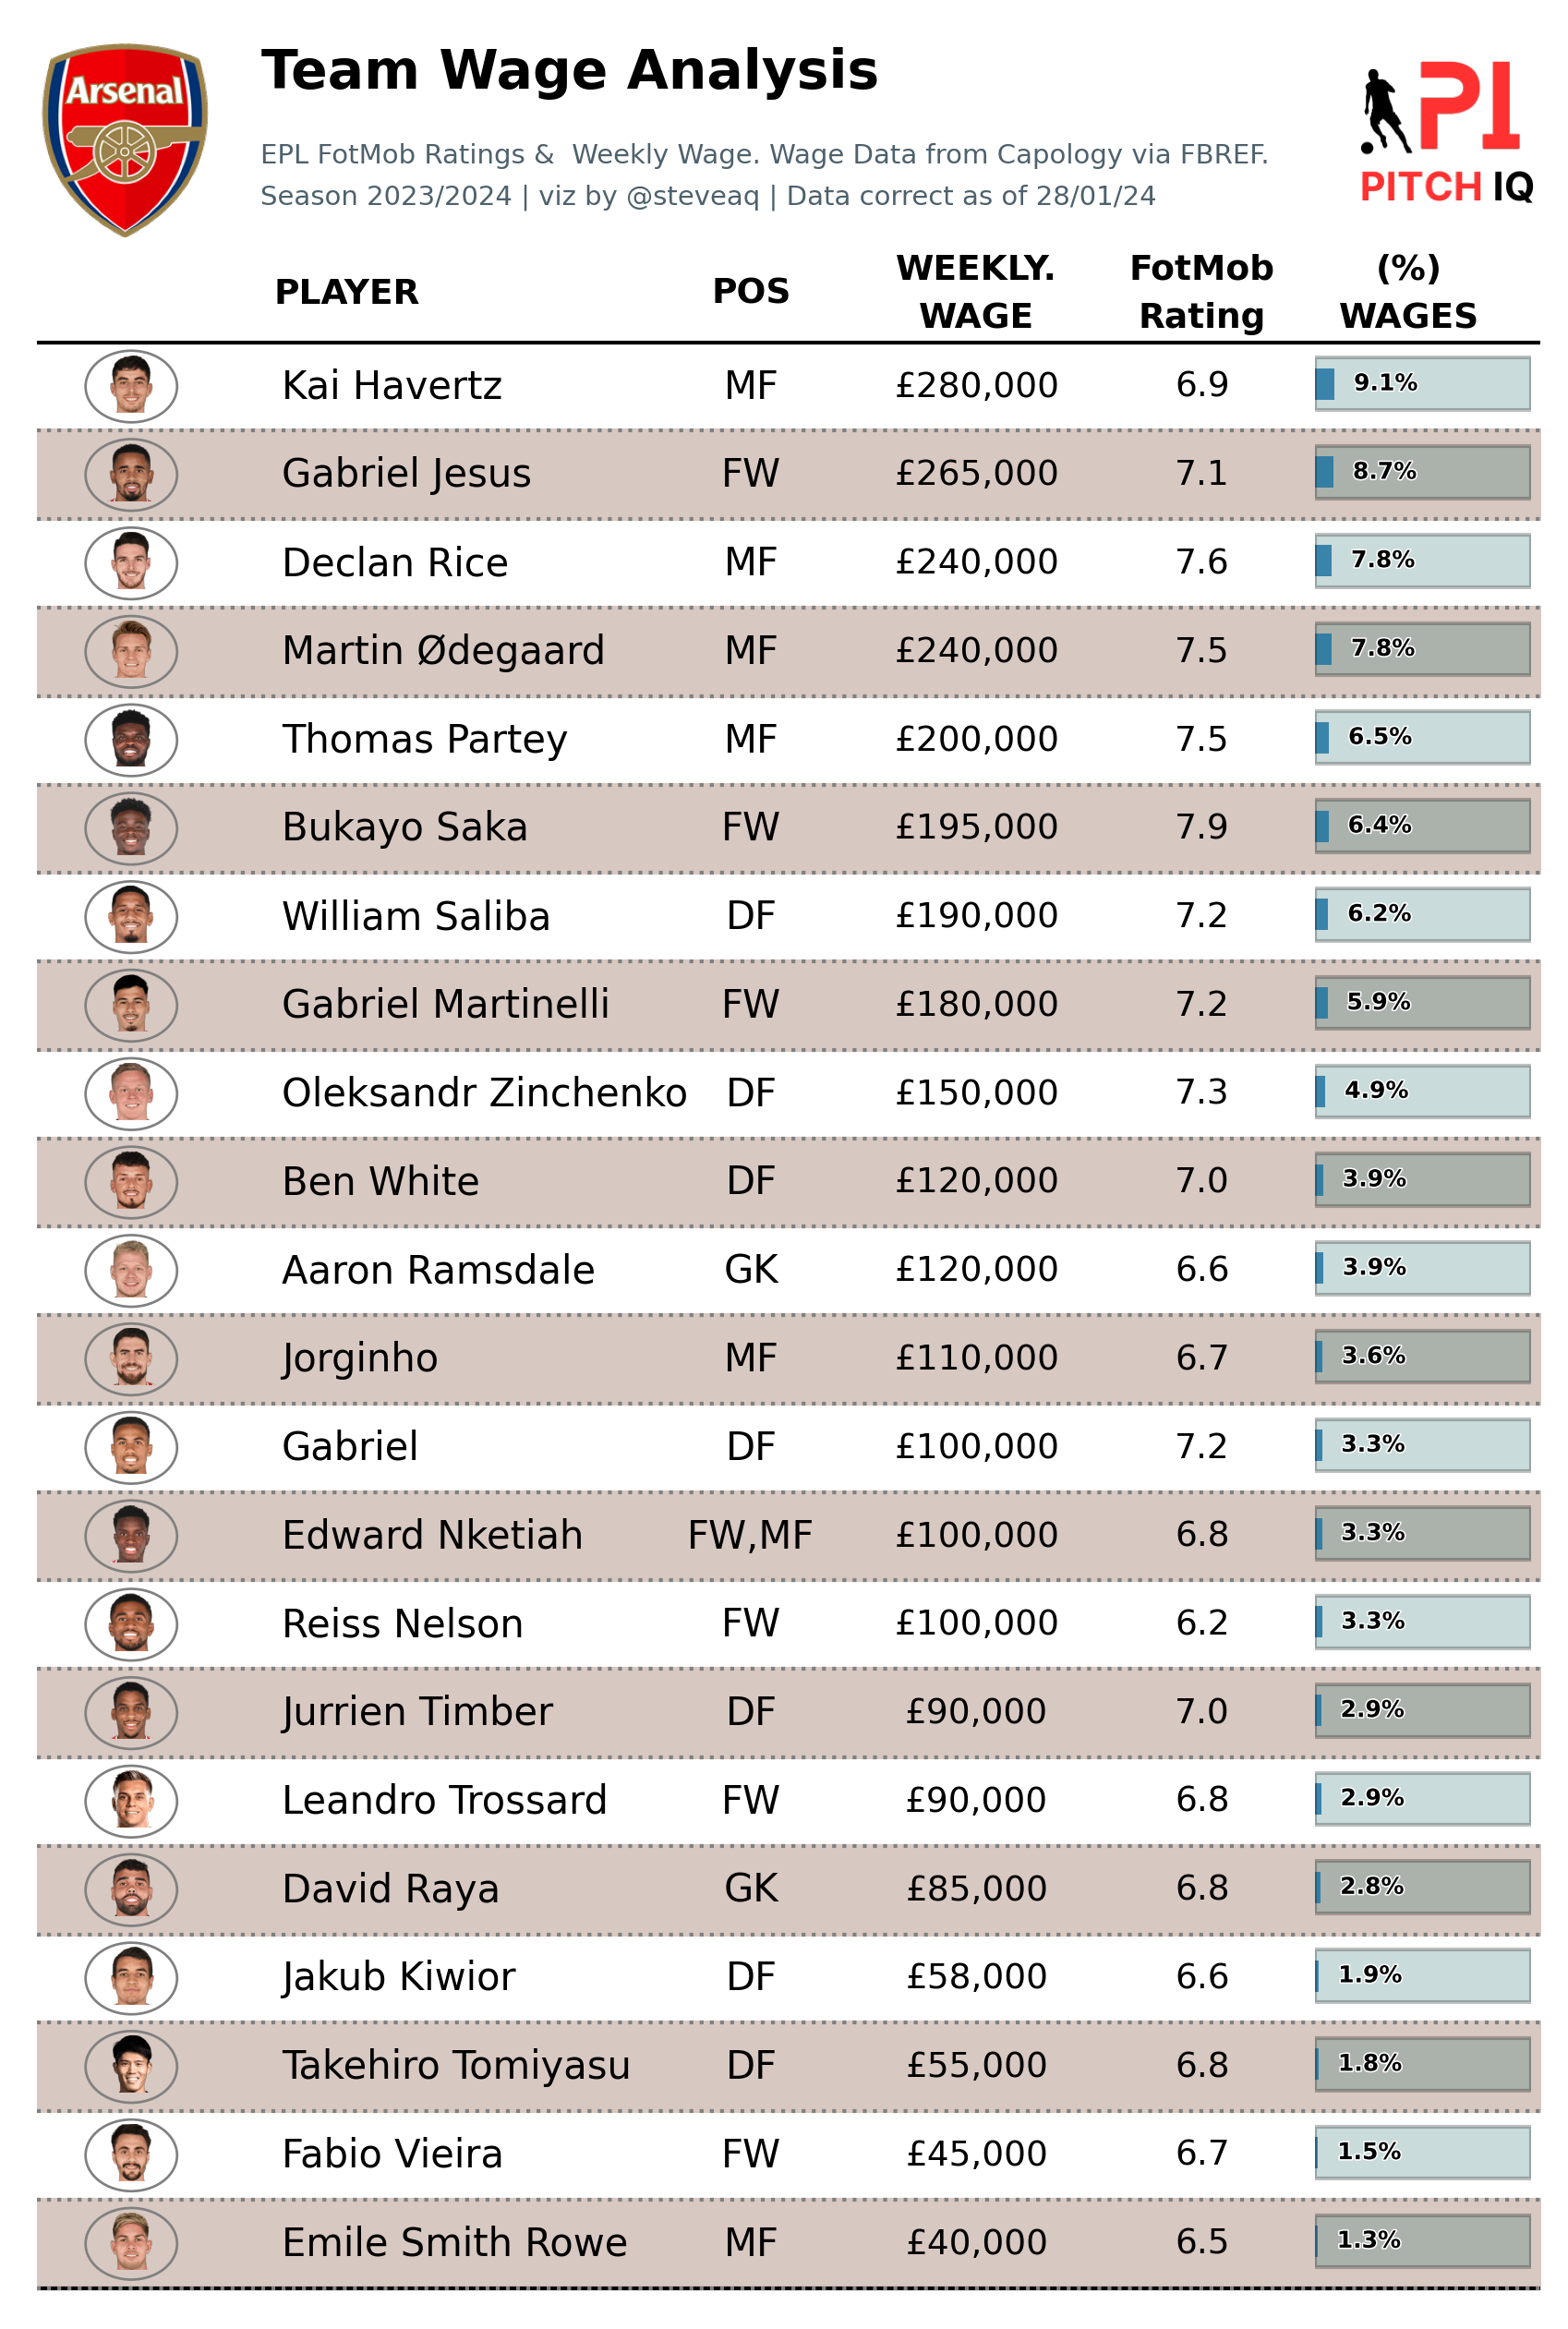

In [95]:
import matplotlib.image as image

filtered_df = filtered_df.sort_values(by='new_pound_value', ascending=True)

fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

nrows = filtered_df.shape[0]
ncols = filtered_df.shape[1] - 7 # because I want to remove aprox. 3 columns from my DF

ax.set_xlim(0, ncols + 1)
ax.set_ylim(-.65, nrows + 1)

x0, y0 = ax.transAxes.transform((0, 0)) # lower left in pixels
x1, y1 = ax.transAxes.transform((1, 1)) # upper right in pixes
dx = x1 - x0
dy = y1 - y0
maxd = max(dx, dy)
width = .35 * maxd / dx
height = .81 * maxd / dy

# Iterate
for y in range(0, nrows):
    # -- Club Logo
    # bbox = Bbox.from_bounds(0, y - .295, 1, .65)
    # logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    # draw_club_image_at_ax(filtered_df['team_id'].iloc[y], logo_ax)
    # -- Player picture
    circle = Ellipse((0.5, y), width, height, ec='grey', fc=fig.get_facecolor(), transform=ax.transData, lw=.65)
    bbox = Bbox.from_bounds(0, y - .295, 1, .65)
    logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    draw_player_image_at_ax(filtered_df['player_id'].iloc[y], logo_ax)
    ax.add_artist(circle)
    # -- Player name
    ax_text(
        x=1.3, y=y,
        s=filtered_df['Name'].iloc[y],
        weight='book', size=10,
        ha='left', va='center', ax=ax, family='Karla'
    )
    # -- Player position
    ax_text(
        x=3.8, y=y,
        s=filtered_df['Pos'].iloc[y],
        weight='book', size=10,
        ha='center', va='center', ax=ax
    )
    # -- Minutes played
    ax_text(
        x=5.0, y=y,
        s=f"£{filtered_df['new_pound_value'].iloc[y]:,.0f}",
        size=9,
        ha='center', va='center', ax=ax
    )
    # # -- Crosses
    ax_text(
        x=6.2, y=y,
        s=f"{filtered_df['FotMobRating'].iloc[y]:,.1f}",
        size=9,
        ha='center', va='center', ax=ax
    )
    # # -- Battery Chart
    bbox = Bbox.from_bounds(6.8, y - .295, 1.15, .65)
    battery_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    battery_ax.set_xlim(0,1)
    battery_ax.barh(y=.5, width=filtered_df['wage_contribution'].iloc[y], height=.3, alpha=.85)
    battery_ax.barh(y=.5, width=1, height=.5, alpha=.25, color='#287271', ec='black')
    text_ = battery_ax.annotate(
        xy=(filtered_df['wage_contribution'].iloc[y], .5),
        xytext=(5,0),
        textcoords='offset points',
        text=f"{filtered_df['wage_contribution'].iloc[y]:.1%}",
        ha='left', va='center',
        size=6, weight='bold'
    )
    text_.set_path_effects(
                [path_effects.Stroke(linewidth=.75, foreground="white"), 
                path_effects.Normal()]
            )
    battery_ax.set_axis_off()
    

# -- Draw border lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows - .5, nrows - .5], lw=1, color='black', zorder=3)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [-.5, -.5], lw=1, color='black', zorder=3)
for x in range(nrows):
    if x % 2 == 0:
        ax.fill_between(x=[ax.get_xlim()[0], ax.get_xlim()[1]], y1=x-.5, y2=x+.5, color='#d7c8c1', zorder=-1)
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x - .5, x - .5], lw=1, color='grey', ls=':', zorder=3)

ax.set_axis_off()


# -- Column titles

ax_text(
    x=1.65, y=nrows + .05,
    s='PLAYER',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)


ax_text(
    x=3.8, y=nrows + .05,
    s='POS',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)


ax_text(
    x=5.0, y=nrows + .05,
    s='WEEKLY.\nWAGE',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=6.2, y=nrows + .05,
    s='FotMob\nRating',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=7.3, y=nrows + .05,
    s='(%)\nWAGES',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)

# ax.plot([5, ax.get_xlim()[1]], [nrows + .85, nrows + .85], lw=1, color='black', zorder=3)

fig_text(
    x = 0.4, y = .92, 
    s = "Team Wage Analysis",
    va = "bottom", ha = "center",
    fontsize = 14, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.24, y = .88, 
    s = "EPL FotMob Ratings &  Weekly Wage. Wage Data from Capology via FBREF.\nSeason 2024/2025 | viz by @steveaq | Data correct as of 28/01/24",
	va = "bottom", ha = "left",
	fontsize = 7, color = "#4E616C", font = "DM Sans"
)

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([0.065, .87, 0.21, 0.07], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{t_id}.png"))

logo_ax.imshow(club_icon)
logo_ax.axis("off")

### Add Stats by Steve logo
ax3 = fig.add_axes([0.80, 0.11, 0.10, 1.6])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)


In [137]:
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import scipy.stats as stats

filtered_df = arsenal

filtered_df['new_pound_value_2'] = filtered_df['new_pound_value']/1000

filtered_df['zscore'] = stats.zscore(filtered_df['new_pound_value_2'])*1 + stats.zscore(filtered_df['General_Rating'])*1
# filtered_df['annotated'] = [True if x > filtered_df['zscore'].quantile(0) else False for x in filtered_df['zscore']]


def pound_formatter(x, pos):
    return f'£{x/1000:.0f}K'

In [150]:
filtered_df
filtered_df = filtered_df.drop_duplicates(subset='Player', keep='first')


In [151]:
# filtered_df = filtered_df[filtered_df['annotated'] == True]

In [152]:
# Update Ethan Nwaneri
filtered_df.loc[filtered_df["Player"] == "Ethan Nwaneri", "annotated"] = True
filtered_df.loc[filtered_df["Player"] == "Ethan Nwaneri", "General_Rating"] = 6.9

# Update Myles Lewis-Skelly
filtered_df.loc[filtered_df["Player"] == "Myles Lewis-Skelly", "annotated"] = True
filtered_df.loc[filtered_df["Player"] == "Myles Lewis-Skelly", "General_Rating"] = 7.2

# Update Jakub Kiwior
filtered_df.loc[filtered_df["Player"] == "Jakub Kiwior", "General_Rating"] = 7.1

filtered_df.loc[filtered_df["Player"] == "Gabriel Jesus", "annotated"] = True

In [153]:
filtered_df

,Player,Nation,Pos,new_pound_value,Squad,team_id,General_Rating,90s,Position_Group,new_pound_value_2,zscore,annotated
0,Kai Havertz,de GER,"FW,MF",280000,Arsenal,9825,7.184697,20.8,Forwards,280.0,2.065744,True
1,Declan Rice,eng ENG,MF,240000,Arsenal,9825,8.303430,31.4,Central Midfielders,240.0,2.615728,True
2,Martin Ødegaard,no NOR,MF,240000,Arsenal,9825,7.712401,25.8,Central Midfielders,240.0,2.057152,True
3,Thomas Partey,gh GHA,"MF,DF",200000,Arsenal,9825,8.271768,31.1,Central Midfielders,200.0,2.078484,True
4,Bukayo Saka,eng ENG,"FW,MF",195000,Arsenal,9825,7.015831,19.2,Forwards,195.0,0.828096,True
5,William Saliba,fr FRA,DF,190000,Arsenal,9825,8.556728,33.8,Defender,190.0,2.220967,True
6,Gabriel Martinelli,br BRA,"FW,MF",180000,Arsenal,9825,7.670185,25.4,Forwards,180.0,1.256274,True
7,Oleksandr Zinchenko,ua UKR,"DF,MF",150000,Arsenal,9825,5.612137,5.9,Defender,150.0,-1.069255,True
8,Ben White,eng ENG,DF,150000,Arsenal,9825,6.393140,13.3,Defender,150.0,-0.331138,True
9,Mikel Merino,es ESP,"MF,FW",130000,Arsenal,9825,6.846966,17.6,Forwards,130.0,-0.155891,True


In [154]:
team_id = 9825

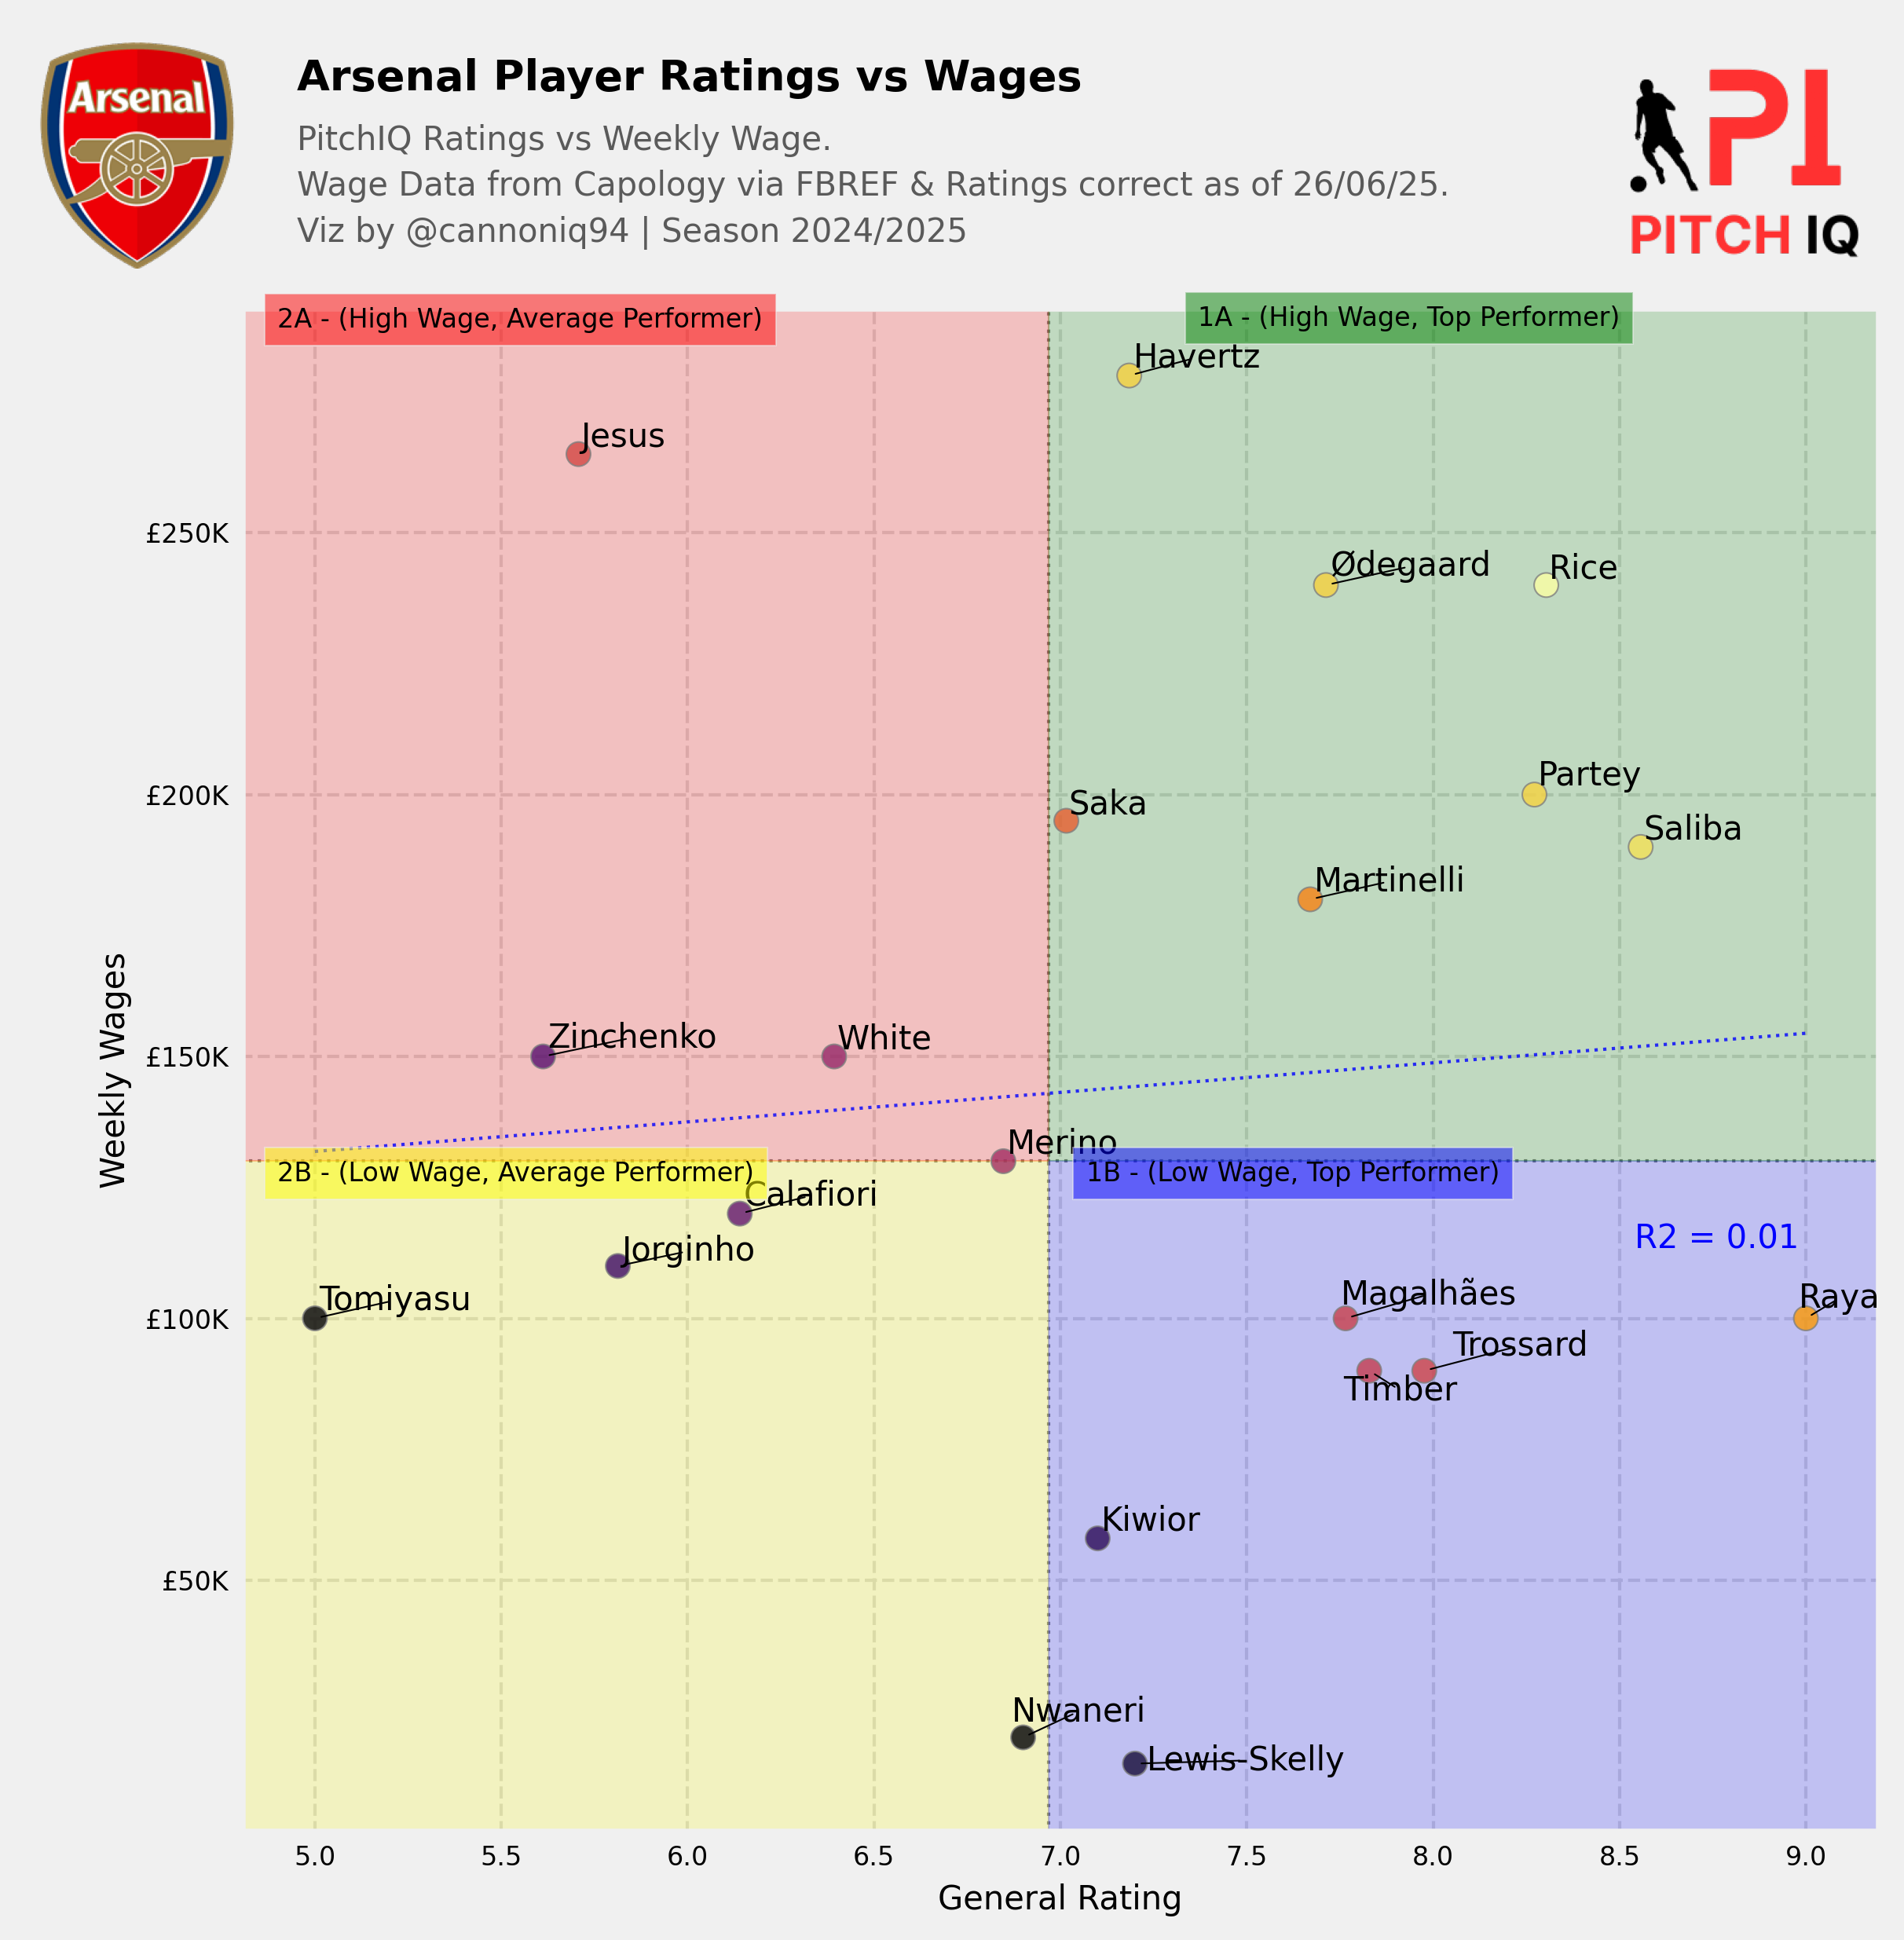

In [155]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.image as image
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from adjustText import adjust_text
import math

# Define a custom formatter for y-axis tick labels
max_ = max(abs(filtered_df['new_pound_value_2'].min()), filtered_df['new_pound_value_2'].max())

fig = plt.figure(figsize=(8, 8), dpi=300)
ax = plt.subplot()
ax.grid(visible=False, ls='--', color='lightgrey')

# Define quadrants based on median values of 'ratings' and 'new_pound_value_2'
median_ratings = ((filtered_df['General_Rating'].median())*0.97)
median_wages = filtered_df['new_pound_value_2'].median()

# Plot scatter points for each quadrant
scatter = ax.scatter(
    filtered_df['General_Rating'], filtered_df['new_pound_value_2'],
    c=filtered_df['zscore'], cmap='inferno',
    zorder=3, ec='grey', s=55, alpha=0.8)

texts = []
annotated_df = filtered_df[filtered_df['annotated']].reset_index(drop=True)
for index in range(annotated_df.shape[0]):
    # Extract last name from 'Name' column by splitting on space and taking the last element
    last_name = annotated_df['Player'].iloc[index].split()[-1]
    texts += [
        ax.text(
            x=annotated_df['General_Rating'].iloc[index], y=annotated_df['new_pound_value_2'].iloc[index],
            s=f"{last_name}",
            color='black',
            weight='light', fontsize=10 
        )
    ]

# Use adjust_text function to move overlapping texts
adjust_text(texts, force_text=(2, 2),
            arrowprops=dict(arrowstyle='-',color='black'),
            autoalign='y',
            only_move={'points':'y'})


# Add dotted line to separate quadrants
ax.axvline(median_ratings, linestyle='dotted', color='grey', lw=1, zorder=0)
ax.axhline(median_wages, linestyle='dotted', color='grey', lw=1, zorder=0)


# Set x-axis and y-axis limits to be equal
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])
ax.set_ylim([ax.get_ylim()[0], ax.get_ylim()[1]])

# Fill quadrants with transparent colors
ax.fill_between(
    [ax.get_xlim()[0], median_ratings],
    ax.get_ylim()[0], median_wages,
    color='yellow', alpha=0.2
)
ax.fill_between(
    [median_ratings, ax.get_xlim()[1]],
    ax.get_ylim()[0], median_wages,
    color='blue', alpha=0.2
)
ax.fill_between(
    [ax.get_xlim()[0], median_ratings],
    median_wages, ax.get_ylim()[1],
    color='red', alpha=0.2
)
ax.fill_between(
    [median_ratings, ax.get_xlim()[1]],
    median_wages, ax.get_ylim()[1],
    color='green', alpha=0.2
)

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=False, prune='both'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x:.0f}K'))
ax.tick_params(axis='both', labelsize=8)  # Updated fontsize to 8

ax.set_ylabel('Weekly Wages', fontsize=10)  # Set y-axis label with font size
ax.set_xlabel('General Rating', fontsize=10)

ax.text(ax.get_xlim()[0] + 0.1, ax.get_ylim()[1] - 0.1,
        '2A - (High Wage, Average Performer)',
        bbox=dict(facecolor='red', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(ax.get_xlim()[0] + 0.1, median_wages + 0.1,
        '2B - (Low Wage, Average Performer)',
        bbox=dict(facecolor='yellow', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(median_ratings + 0.4, ax.get_ylim()[1] + 0.15,
        '1A - (High Wage, Top Performer)',
        bbox=dict(facecolor='green', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(median_ratings + 0.1, median_wages + 0.1,
        '1B - (Low Wage, Top Performer)',
        bbox=dict(facecolor='blue', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')

coefficients = np.polyfit(filtered_df['General_Rating'], filtered_df['new_pound_value_2'], 1)
p = np.poly1d(coefficients)
x_regression = np.linspace(np.min(filtered_df['General_Rating']), np.max(filtered_df['General_Rating']), 100)
y_regression = p(x_regression)

# Plot the regression line
ax.plot(x_regression, y_regression, c='b', label='Regression Line', linewidth=1, linestyle=':', alpha=0.8)

# Add R2 value as text
r2 = np.corrcoef(filtered_df['General_Rating'], filtered_df['new_pound_value_2'])[0, 1] ** 2  # Calculate R2 value
ax.text(0.85, 0.4, f'R2 = {r2:.2f}', transform=ax.transAxes, ha='left', va='top',fontsize=10,color='blue')





ax3 = fig.add_axes([0.78, 0.89, 0.19, 0.14])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/Code/cannoniq/Images/piqmain.png')
ax3.imshow(img)




fig_text(
    x=0.11, y=.99,
    s="Arsenal Player Ratings vs Wages",
    va="bottom", ha="left",
    fontsize= 13, color="black", weight="bold"
)
fig_text(
    x=0.11, y=0.91,
    s="PitchIQ Ratings vs Weekly Wage.\nWage Data from Capology via FBREF & Ratings correct as of 26/06/25.\nViz by @cannoniq94 | Season 2024/2025",
    va="bottom", ha="left",
    fontsize=10, color="#5A5A5A",
)
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([-0.08, .90, 0.21, 0.12], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")


plt.show()


In [148]:
filtered_df

,Player,Nation,Pos,new_pound_value,Squad,team_id,General_Rating,90s,Position_Group,new_pound_value_2,zscore,annotated
0,Kai Havertz,de GER,"FW,MF",280000,Arsenal,9825,7.184697,20.8,Forwards,280.0,2.065744,True
1,Declan Rice,eng ENG,MF,240000,Arsenal,9825,8.303430,31.4,Central Midfielders,240.0,2.615728,True
2,Martin Ødegaard,no NOR,MF,240000,Arsenal,9825,7.712401,25.8,Central Midfielders,240.0,2.057152,True
3,Thomas Partey,gh GHA,"MF,DF",200000,Arsenal,9825,8.271768,31.1,Central Midfielders,200.0,2.078484,True
4,Bukayo Saka,eng ENG,"FW,MF",195000,Arsenal,9825,7.015831,19.2,Forwards,195.0,0.828096,True
5,William Saliba,fr FRA,DF,190000,Arsenal,9825,8.556728,33.8,Defender,190.0,2.220967,True
6,Gabriel Martinelli,br BRA,"FW,MF",180000,Arsenal,9825,7.670185,25.4,Forwards,180.0,1.256274,True
7,Oleksandr Zinchenko,ua UKR,"DF,MF",150000,Arsenal,9825,5.612137,5.9,Defender,150.0,-1.069255,True
8,Ben White,eng ENG,DF,150000,Arsenal,9825,6.393140,13.3,Defender,150.0,-0.331138,True
9,Mikel Merino,es ESP,"MF,FW",130000,Arsenal,9825,6.846966,17.6,Forwards,130.0,-0.155891,True


In [10]:
wages_df.rename(columns={'Player': 'Name'}, inplace=True)
merged_df = pd.merge(wages_df,epl_player_ratings,on='Name')

NameError: name 'epl_player_ratings' is not defined

In [103]:
team_names = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
wage_dist = pd.merge(merged_df, team_names, on='team_id')
cols = ["Name", "Age", "new_pound_value", "team_id", "team"]
wage_dist = wage_dist[cols]

def remove_duplicates(df):
    df.drop_duplicates(subset=["Name"], keep="last", inplace=True)
    return df

wage_dist = remove_duplicates(wage_dist)

In [104]:
def create_wage_bins(df):
    bin_labels = ["<£10k", "£10k-£50k", "£50k-£80k", "£80k-£100k", "£100k-£150k", "£150k-£200k", "£200k+"]
    bin_edges = [0, 10000, 50000, 80000, 100000, 150000, 200000, 500000]
    
    df["Wage_Bin"] = pd.cut(df["new_pound_value"], bins=bin_edges, labels=bin_labels, include_lowest=True)
    df.dropna(subset=["Wage_Bin"], inplace=True)
    bin_counts = df.groupby("Wage_Bin")["team"].nunique()
    df["Count"] = df["Wage_Bin"].map(bin_counts)
    return df

wages_viz = create_wage_bins(wage_dist)

In [105]:
wages_viz.to_csv("wage_viz.csv")

In [106]:
wage_bill = wages_viz.groupby(['team','team_id' ])['new_pound_value'].sum() 
wage_bill = pd.DataFrame(wage_bill).reset_index()
wage_bill = wage_bill[['team','new_pound_value']].sort_values(by='new_pound_value', ascending=False)

In [107]:
aggregated_df = wages_viz.groupby(['team', 'Wage_Bin']).size().reset_index(name='Count')

In [108]:
all_bins = ["<£10k", "£10k-£50k", "£50k-£80k", "£80k-£100k", "£100k-£150k", "£150k-£200k", "£200k+"]

# Get unique teams and team_ids
unique_teams = aggregated_df['team'].unique()

result_dfs = []
for team in unique_teams:

    team_data = aggregated_df[(aggregated_df['team'] == team)]
    team_combinations = pd.DataFrame({'Wage_Bin': all_bins})
    merged_data = team_combinations.merge(team_data, on='Wage_Bin', how='left').fillna(0)
    merged_data['team'] = team
    result_dfs.append(merged_data)

aggregated_df = pd.concat(result_dfs, ignore_index=True)
aggregated_df = aggregated_df[['team', 'Wage_Bin', 'Count']].sort_values(by=['team'])


In [109]:
team_ids = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
team_ids = team_ids[['team','team_id']]

In [110]:
aggregated_df = pd.merge(aggregated_df,team_ids, on='team', how='left')
aggregated_df = pd.merge(aggregated_df,wage_bill, on='team', how='left')

In [111]:
wage_bin_order = ["<£10k", "£10k-£50k", "£50k-£80k", "£80k-£100k", "£100k-£150k", "£150k-£200k", "£200k+"]

# Set Wage_Bin column as ordered categorical to maintain the specified order
aggregated_df['Wage_Bin'] = pd.Categorical(aggregated_df['Wage_Bin'], categories=wage_bin_order, ordered=True)

# Sort the DataFrame by team and Wage_Bin
aggregated_df = aggregated_df.sort_values(by=['team', 'Wage_Bin'])

In [112]:
wage_bill_rank = pd.merge(wage_bill,team_ids, on='team', how='left')

In [113]:
team_list = list(wage_bill_rank.team_id.unique())

In [114]:
colors = [
    '#302028', '#206890', '#085898', '#375196', '#FF3333', '#085098', '#005898',
    '#330000', '#005090', '#007838', '#0C2044', '#0044CC', '#FF6600', '#FF3399',
    '#00CC99', '#9900FF', '#FF00CC', '#66FF33', '#FFCC00', '#3399FF'
]
color_dict = dict(zip(team_list,colors))

In [115]:
aggregated_df["teamColor"] = aggregated_df['team_id'].map(color_dict)

In [116]:
aggregated_df

,team,Wage_Bin,Count,team_id,new_pound_value,teamColor
0,Arsenal,<£10k,0.0,9825,2893000,#085898
1,Arsenal,£10k-£50k,2.0,9825,2893000,#085898
2,Arsenal,£50k-£80k,4.0,9825,2893000,#085898
3,Arsenal,£80k-£100k,3.0,9825,2893000,#085898
4,Arsenal,£100k-£150k,4.0,9825,2893000,#085898
5,Arsenal,£150k-£200k,4.0,9825,2893000,#085898
6,Arsenal,£200k+,4.0,9825,2893000,#085898
12,Aston Villa,<£10k,0.0,10252,1712885,#085098
10,Aston Villa,£10k-£50k,3.0,10252,1712885,#085098
11,Aston Villa,£50k-£80k,5.0,10252,1712885,#085098


In [117]:
def plot_barchart_wages(ax, team_id, color, labels_x = False, labels_y = False):
    '''
    This function plots the bar chart showing the proportion
    of goals and xG created by each side in a specific interval of time.

    Args:
        ax (object): the matplotlib ax object
        teamId (int): the Fotmob team id
        color (str): the HEX color string to use for the plot
    '''

    global aggregated_df

    data = aggregated_df.copy()
    data = data[data["team_id"] == team_id].reset_index(drop = True)

    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines["top"].set_visible(False)

    # Set border properties for the subplot
    border_width = 0.5
    border_color = 'black'

    ax.spines['top'].set_linewidth(border_width)  # Top border width
    ax.spines['top'].set_color(border_color)  # Top border color

    ax.spines['bottom'].set_linewidth(border_width)  # Bottom border width
    ax.spines['bottom'].set_color(border_color)  # Bottom border color

    ax.spines['left'].set_linewidth(border_width)  # Left border width
    ax.spines['left'].set_color(border_color)  # Left border color

    ax.spines['right'].set_linewidth(border_width)  # Right border width
    ax.spines['right'].set_color(border_color)  # Right border color


    ax.xaxis.set_visible(True)
    ax.yaxis.set_visible(True)

    ax.grid(True, lw = 1, ls = '--', color = "lightgrey")
    
    ax.bar(
        data.index,
        data["Count"],
        color = color,
        alpha = 0.6,
        zorder = 3,
        width = .65
    )
    ax.bar(
        data.index,
        data["Count"],
        color = color,
        width = 0.25,
        zorder =3
    )




    ax.set_xticks(data.index)
    if labels_x:
        labels = ["<£10k", "£10k-£50k", "£50k-£80k", "£80k-£100k", "£100k-£150k", "£150k-£200k", "£200k+"]
        ax.set_xticklabels(labels, fontsize=9, rotation=45, ha='right', va='top')
    else:
        ax.set_xticklabels([])

    ax.set_ylim(0,30)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

    if labels_y == False:
        ax.set_yticklabels([])




    # ---- Nice touches to the viz
    ax.plot([2.5, 2.5], [0, .5], color = "gray", lw = 1.15, ls = "--")

    for index, height in enumerate(data["Count"]):
        if height != 0:
            text_ = ax.annotate(
                xy = (index, height),
                text = f"{height:.0f}",
                xytext = (0, 7.5),
                textcoords = "offset points",
                ha = "center",
                va = "center",
                size = 10,
                weight = "bold",
                color = "black"
            )
            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()])
        else:
            text_ = ax.annotate(
                xy = (index, height),
                text = " ",
                xytext = (0, 7.5),
                textcoords = "offset points",
                ha = "center",
                va = "center",
                size = 10,
                weight = "bold",
                color = "black"
            )
            text_.set_path_effects(
                [path_effects.Stroke(linewidth=1.75, foreground="white"), path_effects.Normal()]
        
            )

    return ax


findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


findfont: Font family ['DM Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


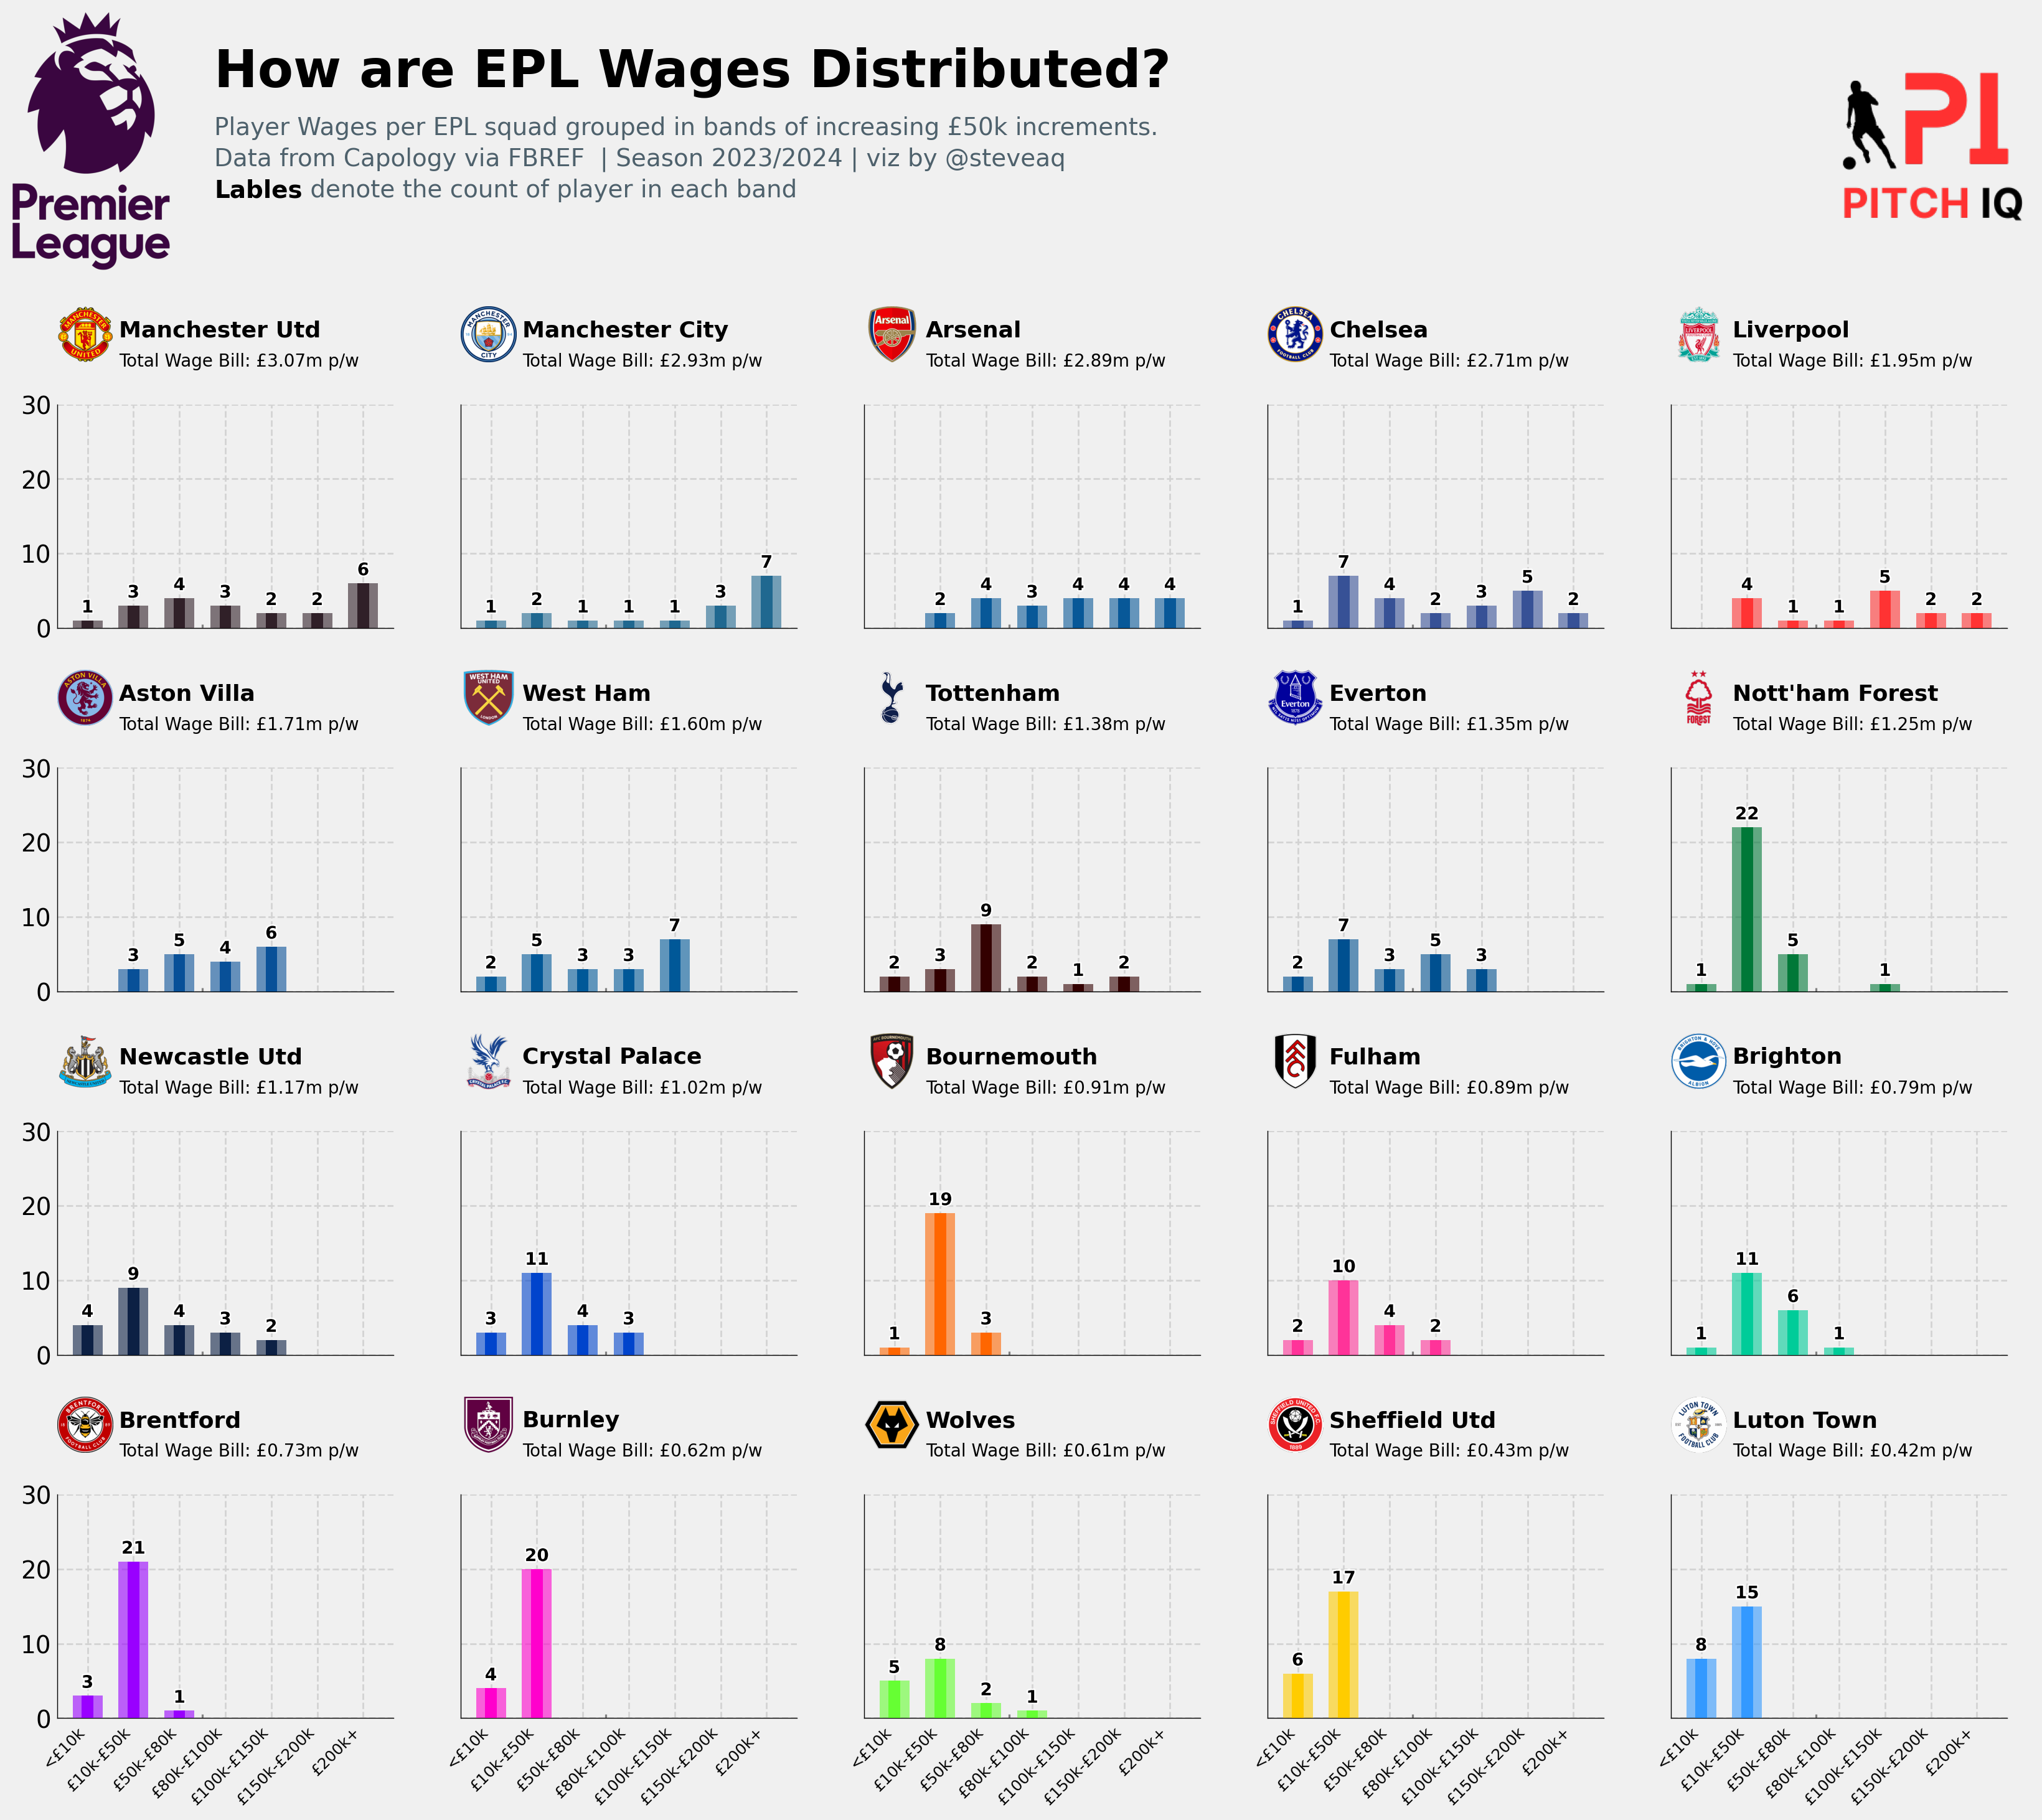

In [118]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects
from matplotlib import rcParams
from highlight_text import ax_text, fig_text
import pandas as pd

from PIL import Image
import urllib
import os
style.use('fivethirtyeight')


df = aggregated_df
fig = plt.figure(figsize=(18, 14), dpi = 200)
nrows = 8
ncols = 5
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios = [(1/nrows)*2. if x % 2 != 0 else (1/nrows)/2. for x in range(nrows)], hspace = 0.3
)

teams = team_list

plot_counter = 0
logo_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col]
            )

            teamId = teams[plot_counter]
            teamcolor = df[df["team_id"] == teamId]["teamColor"].iloc[0]

            if col == 0:
                labels_y = True
            else:
                labels_y = False
            
            if row == nrows - 1:
                labels_x = True
            else:
                labels_x = False
            
            plot_barchart_wages(ax, teamId, teamcolor, labels_x, labels_y)           

            plot_counter += 1
        
        else:

            teamId = teams[logo_counter]
            teamName = df[df["team_id"] == teamId]["team"].iloc[0]

            wages = df[df["team_id"] == teamId]["new_pound_value"].sum()/7000000


            fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = "NW", facecolor = "#EFE9E6"
            )
            club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{teamId:.0f}.png"))
            logo_ax.imshow(club_icon)
            logo_ax.axis("off")

            # # Add the team name
            ax_text(
                x = 1.1, 
                y = 0.76,
                s = f"{teamName}",
                ax = logo_ax, 
                weight = "bold", 
                font = "Karla", 
                ha = "left", 
                size = 13, 
                annotationbbox_kw = {"xycoords":"axes fraction"}
            )

            # # Add the subtitles for each side
            ax_text(
                x = 1.1,
                y = 0.18,
                s = f"Total Wage Bill: £{wages:.2f}m p/w",
                ax = logo_ax, 
                weight = "normal", 
                font = "Karla", 
                ha = "left", 
                size = 10, 
                annotationbbox_kw = {"xycoords":"axes fraction"}
            )

            logo_counter += 1


fig_text(
    x = 0.15, y = 1, 
    s = "How are EPL Wages Distributed?",
    va = "bottom", ha = "left",
    fontsize = 30, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.15, y = .94, 
    s = "Player Wages per EPL squad grouped in bands of increasing £50k increments.\nData from Capology via FBREF  | Season 2023/2024 | viz by @steveaq\n<Lables> denote the count of player in each band",
    highlight_textprops=[{"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 14, color = "#4E616C", font = "Karla"
)

ax2 = fig.add_axes([0.06, 0.55, 0.07, 0.85])
ax2.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
ax2.imshow(img)


### Add Stats by Steve logo
ax3 = fig.add_axes([0.87, 0.55, 0.09, .85])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)

